<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [5]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [11]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()



--2025-04-02 05:44:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  70.2MB/s    in 2.2s    

2025-04-02 05:44:12 (70.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


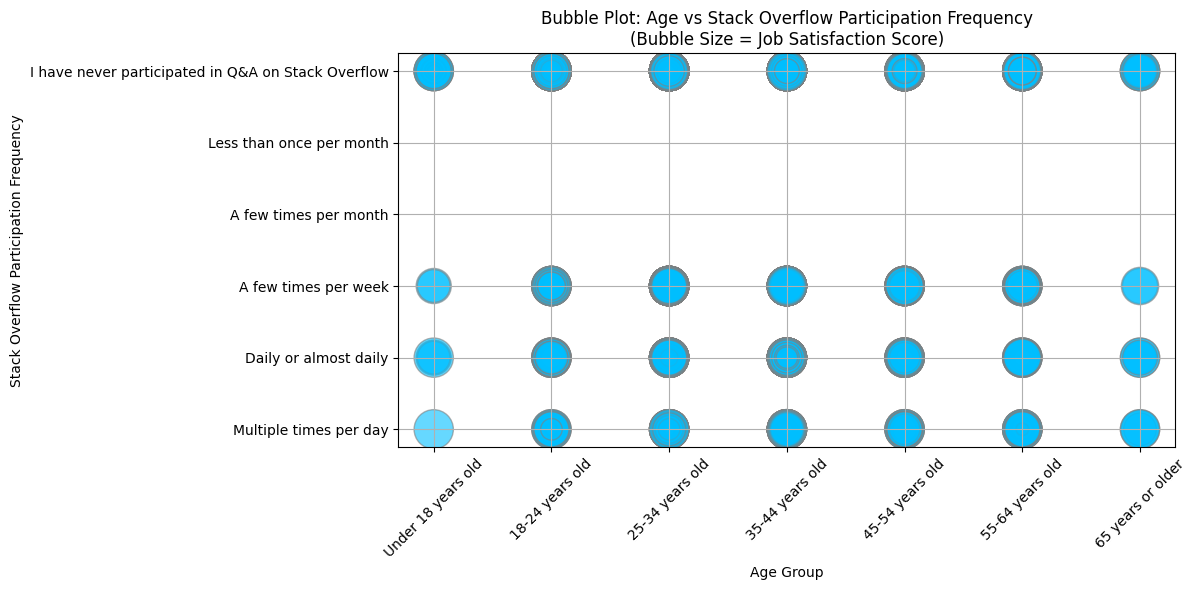

In [18]:
# 欠損を除去
df = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# 年齢カテゴリの順序定義（X軸用）
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(age_order)]
df['AgeCat'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
df['AgeCode'] = df['AgeCat'].cat.codes

# SOPartFreq の順序定義（Y軸用）
sopart_order = [
    'Multiple times per day',
    'Daily or almost daily',
    'A few times per week',
    'A few times per month',
    'Less than once per month',
    'I have never participated in Q&A on Stack Overflow'
]
df = df[df['SOPartFreq'].isin(sopart_order)]
df['SOPartFreqCat'] = pd.Categorical(df['SOPartFreq'], categories=sopart_order, ordered=True)
df['SOPartFreqCode'] = df['SOPartFreqCat'].cat.codes

# バブルサイズ（満足度スコア * 80 で視認性確保）
df['BubbleSize'] = df['JobSat'] * 80

# バブルプロット
plt.figure(figsize=(12, 6))
plt.scatter(
    df['AgeCode'],
    df['SOPartFreqCode'],
    s=df['BubbleSize'],
    alpha=0.6,
    color='deepskyblue',
    edgecolors='gray'
)

# 軸ラベル変換
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.yticks(ticks=range(len(sopart_order)), labels=sopart_order)

# グラフ装飾
plt.title('Bubble Plot: Age vs Stack Overflow Participation Frequency\n(Bubble Size = Job Satisfaction Score)')
plt.xlabel('Age Group')
plt.ylabel('Stack Overflow Participation Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


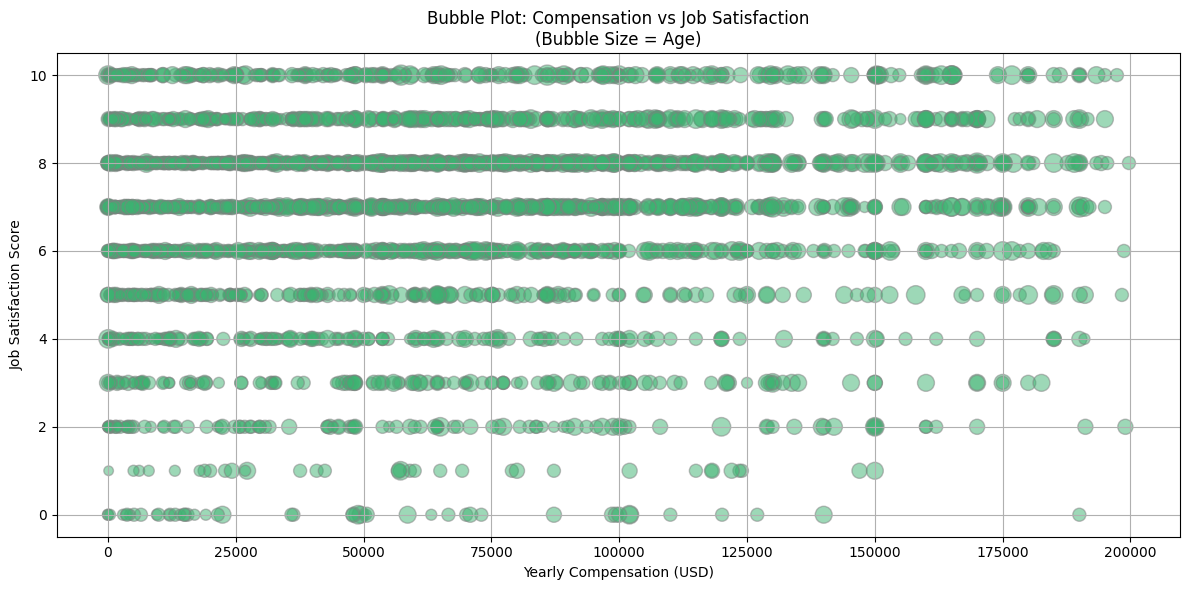

In [19]:
# 年齢カテゴリ → 中央値で数値化
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

# 数値変換と欠損除外
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'AgeNumeric'])

# 外れ値（年収の上位5%）を除外
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# バブルサイズ（年齢を倍率で拡大）
df['BubbleSize'] = df['AgeNumeric'] * 3

# バブルプロット描画
plt.figure(figsize=(12, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSat'],
            s=df['BubbleSize'],
            alpha=0.5,
            color='mediumseagreen',
            edgecolors='gray')

# グラフ装飾
plt.title('Bubble Plot: Compensation vs Job Satisfaction\n(Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_1142/2541955865.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity = df.groupby(['Age', 'Languages']).size().reset_index(name='Count')


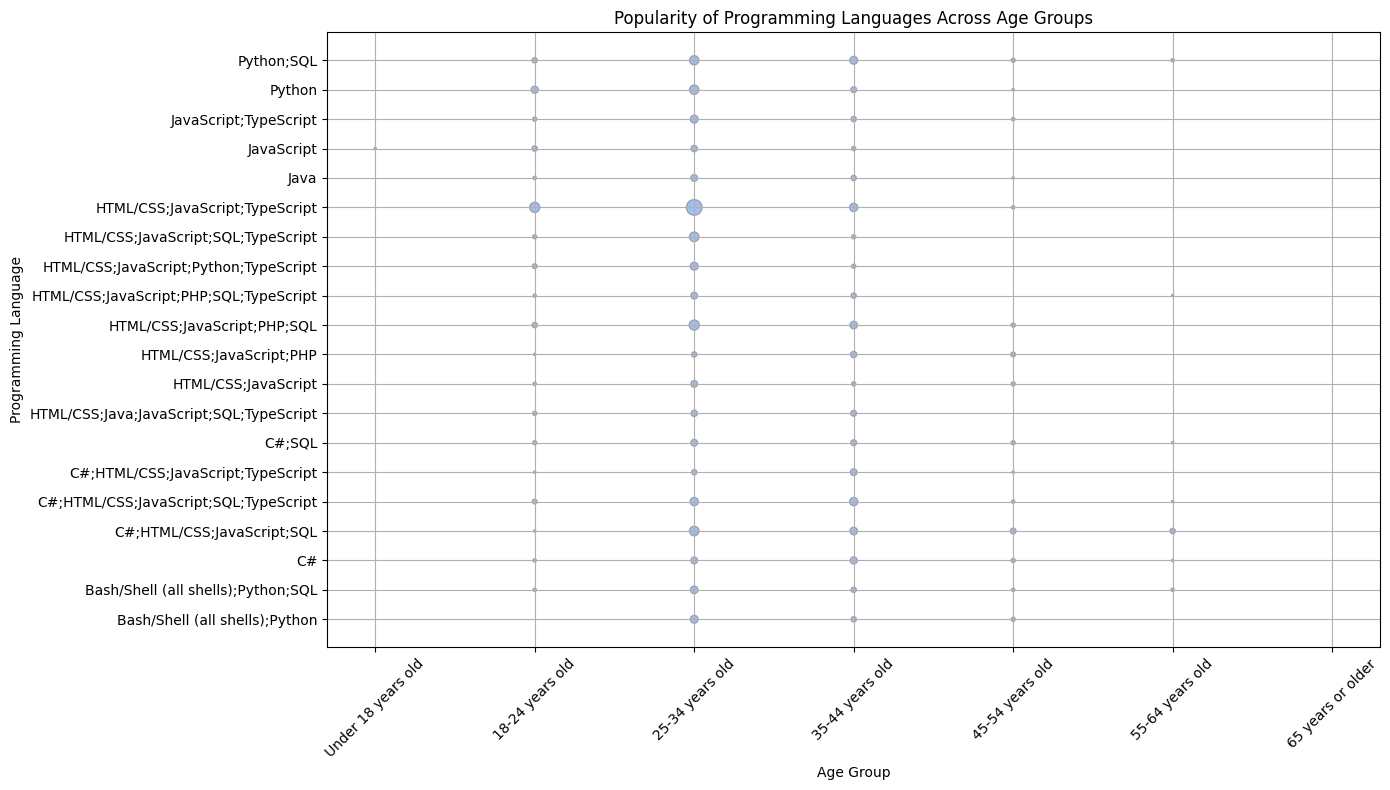

In [21]:
# 欠損を除外
df = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# 言語をカンマで分割し、explodeで展開
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(',')
df = df.explode('Languages')
df['Languages'] = df['Languages'].str.strip()  # 前後空白を除去

# 年齢カテゴリの順序を定義（X軸）
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(age_order)]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# 言語と年齢カテゴリごとの件数をカウント（＝人気度）
popularity = df.groupby(['Age', 'Languages']).size().reset_index(name='Count')

# 使用者数が多いTOP20言語に絞る（多すぎると見づらいため）
top_languages = popularity.groupby('Languages')['Count'].sum().nlargest(20).index.tolist()
popularity = popularity[popularity['Languages'].isin(top_languages)]

# 描画
plt.figure(figsize=(14, 8))
plt.scatter(
    x=popularity['Age'],
    y=popularity['Languages'],
    s=popularity['Count'] * 3,  # バブルサイズ調整
    alpha=0.6,
    color='cornflowerblue',
    edgecolors='gray'
)

# グラフ装飾
plt.title('Popularity of Programming Languages Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


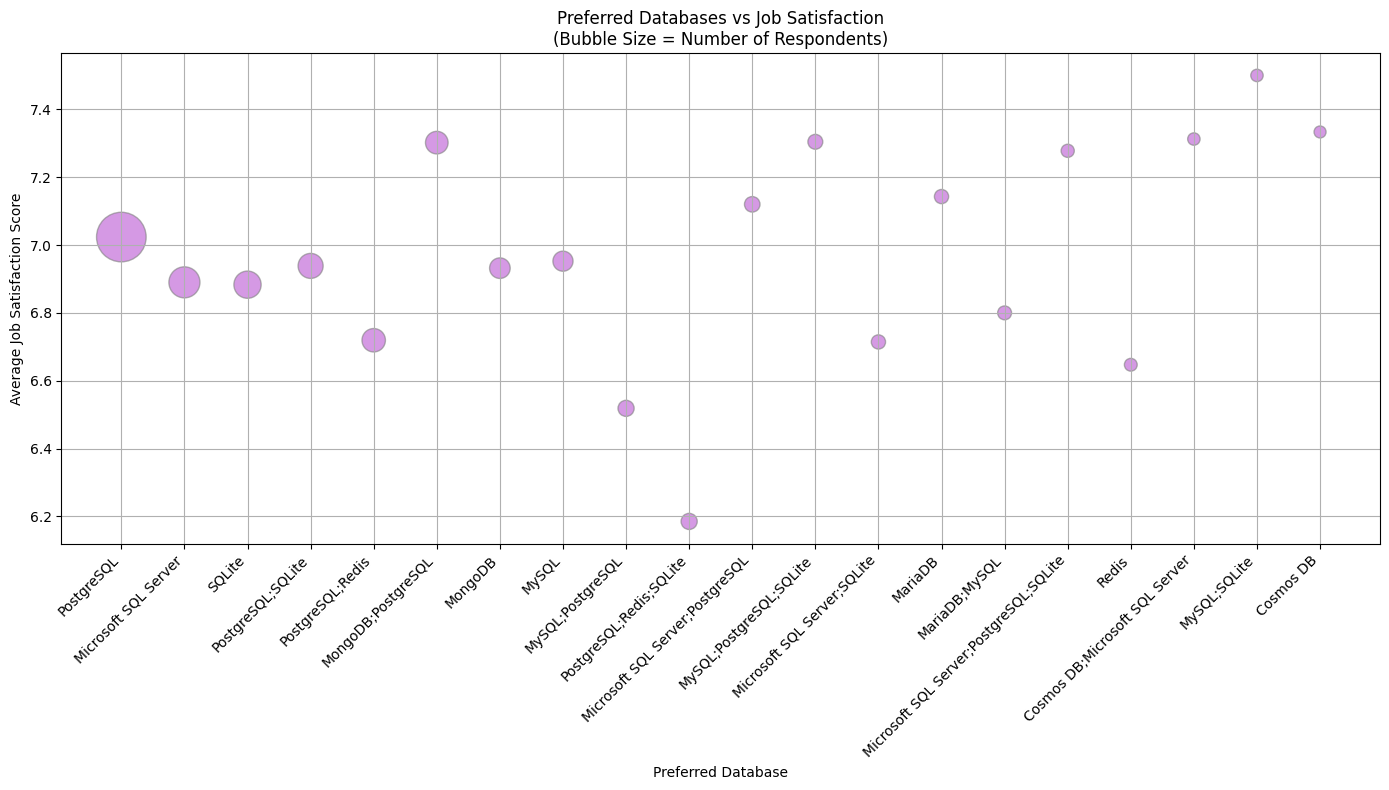

In [22]:
# 欠損を除去
df = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['JobSat'])

# データベースを分割してexplode
df['Database'] = df['DatabaseWantToWorkWith'].str.split(',')
df = df.explode('Database')
df['Database'] = df['Database'].str.strip()

# データベースごとの満足度平均と人数を集計
summary = df.groupby('Database').agg(
    AvgJobSat=('JobSat', 'mean'),
    RespondentCount=('Database', 'count')
).reset_index()

# 上位20個のみに絞る（視認性のため）
summary = summary.sort_values(by='RespondentCount', ascending=False).head(20)

# バブルサイズを調整
summary['BubbleSize'] = summary['RespondentCount'] * 5

# プロット
plt.figure(figsize=(14, 8))
plt.scatter(
    summary['Database'],
    summary['AvgJobSat'],
    s=summary['BubbleSize'],
    alpha=0.6,
    color='mediumorchid',
    edgecolors='gray'
)

# ラベル整備
plt.xticks(rotation=45, ha='right')
plt.title('Preferred Databases vs Job Satisfaction\n(Bubble Size = Number of Respondents)')
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


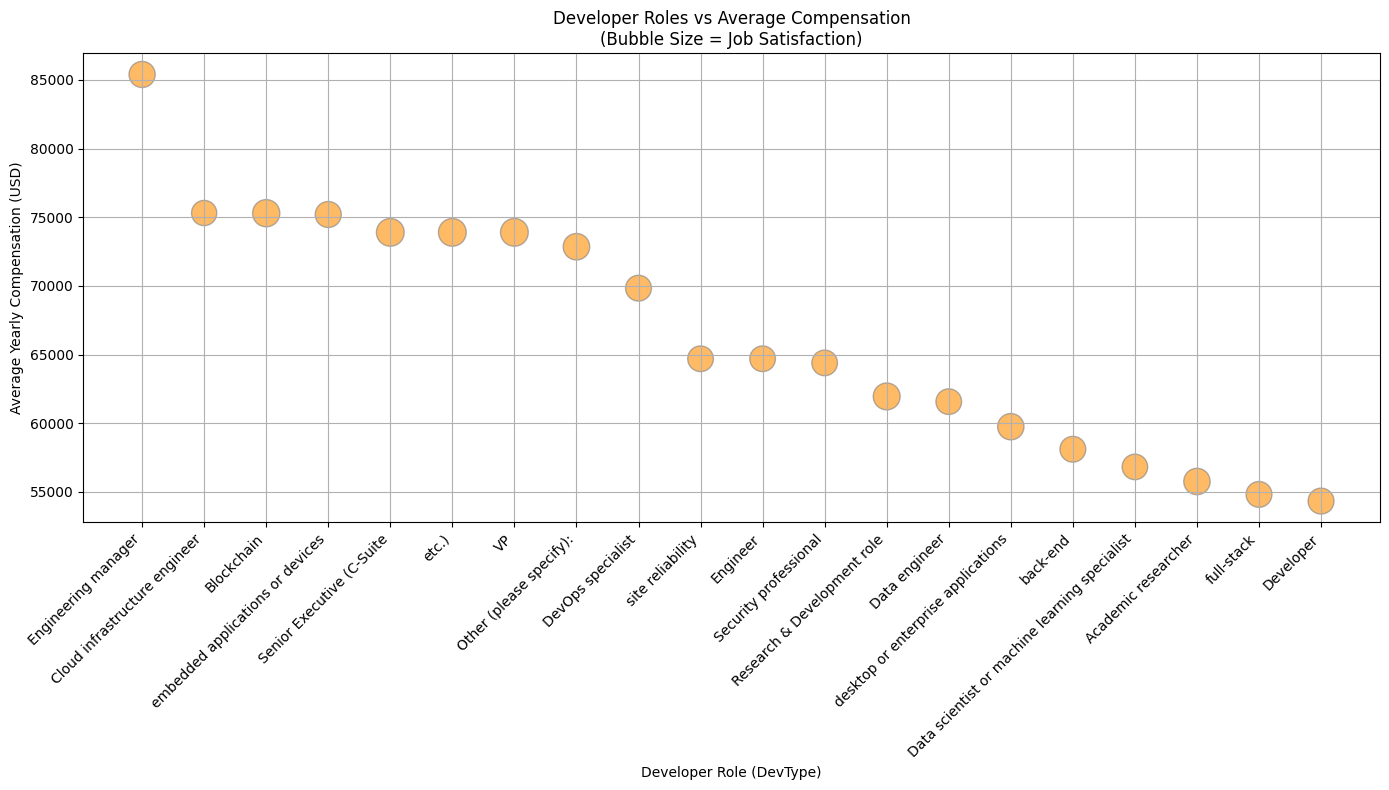

In [23]:
# 欠損と数値変換
df = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat'])

# DevType を分割して explode
df['DevType'] = df['DevType'].str.split(',')
df = df.explode('DevType')
df['DevType'] = df['DevType'].str.strip()

# DevType ごとの平均年収と平均満足度を集計
summary = df.groupby('DevType').agg(
    AvgComp=('ConvertedCompYearly', 'mean'),
    AvgJobSat=('JobSat', 'mean'),
    Count=('DevType', 'count')
).reset_index()

# 件数が少ないものを除外（任意、例：10件未満）
summary = summary[summary['Count'] >= 10]

# バブルサイズ（満足度スコア × 50 で調整）
summary['BubbleSize'] = summary['AvgJobSat'] * 50

# 上位20役職のみ表示（視認性のため）
summary = summary.sort_values(by='AvgComp', ascending=False).head(20)

# プロット
plt.figure(figsize=(14, 8))
plt.scatter(
    summary['DevType'],
    summary['AvgComp'],
    s=summary['BubbleSize'],
    alpha=0.6,
    color='darkorange',
    edgecolors='gray'
)

# 軸・タイトル整備
plt.xticks(rotation=45, ha='right')
plt.title('Developer Roles vs Average Compensation\n(Bubble Size = Job Satisfaction)')
plt.xlabel('Developer Role (DevType)')
plt.ylabel('Average Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_1142/469791526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tool'] = df['NEWCollabToolsHaveWorkedWith'].str.split(',')
/tmp/ipykernel_1142/469791526.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age', 'Tool']).size().reset_index(name='Count')


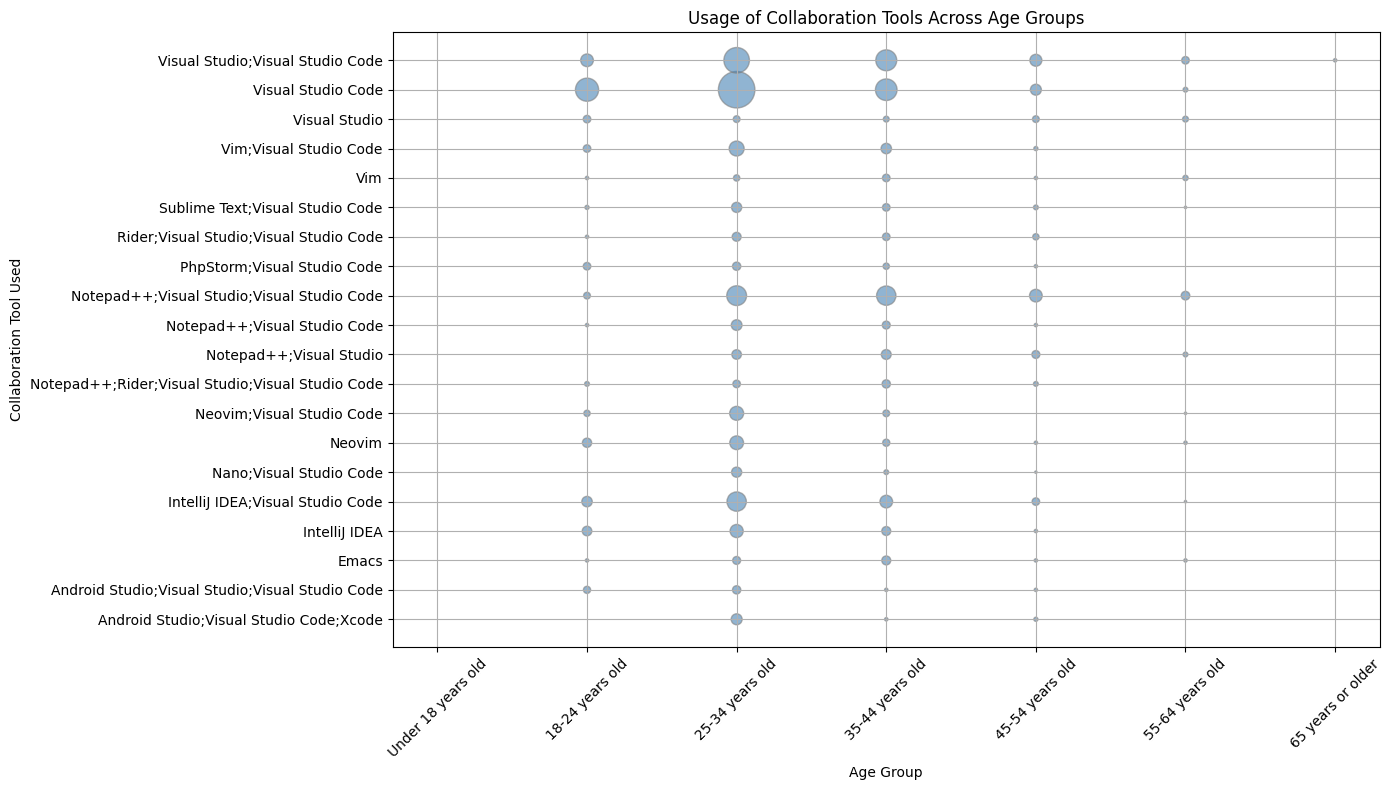

In [30]:
# 欠損を除去
df = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

# ツールを分割して explode
df['Tool'] = df['NEWCollabToolsHaveWorkedWith'].str.split(',')
df = df.explode('Tool')
df['Tool'] = df['Tool'].str.strip()

# 年齢カテゴリの順序を定義（X軸用）
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df = df[df['Age'].isin(age_order)]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# 使用者数を集計（年齢 × ツール）
grouped = df.groupby(['Age', 'Tool']).size().reset_index(name='Count')

# 使用頻度上位のツールだけに絞る（視認性を確保）
top_tools = grouped.groupby('Tool')['Count'].sum().nlargest(20).index.tolist()
grouped = grouped[grouped['Tool'].isin(top_tools)]

# プロット
plt.figure(figsize=(14, 8))
plt.scatter(
    x=grouped['Age'],
    y=grouped['Tool'],
    s=grouped['Count'] * 3,  # バブルサイズ調整
    alpha=0.6,
    color='steelblue',
    edgecolors='gray'
)

# グラフ装飾
plt.title('Usage of Collaboration Tools Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool Used')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



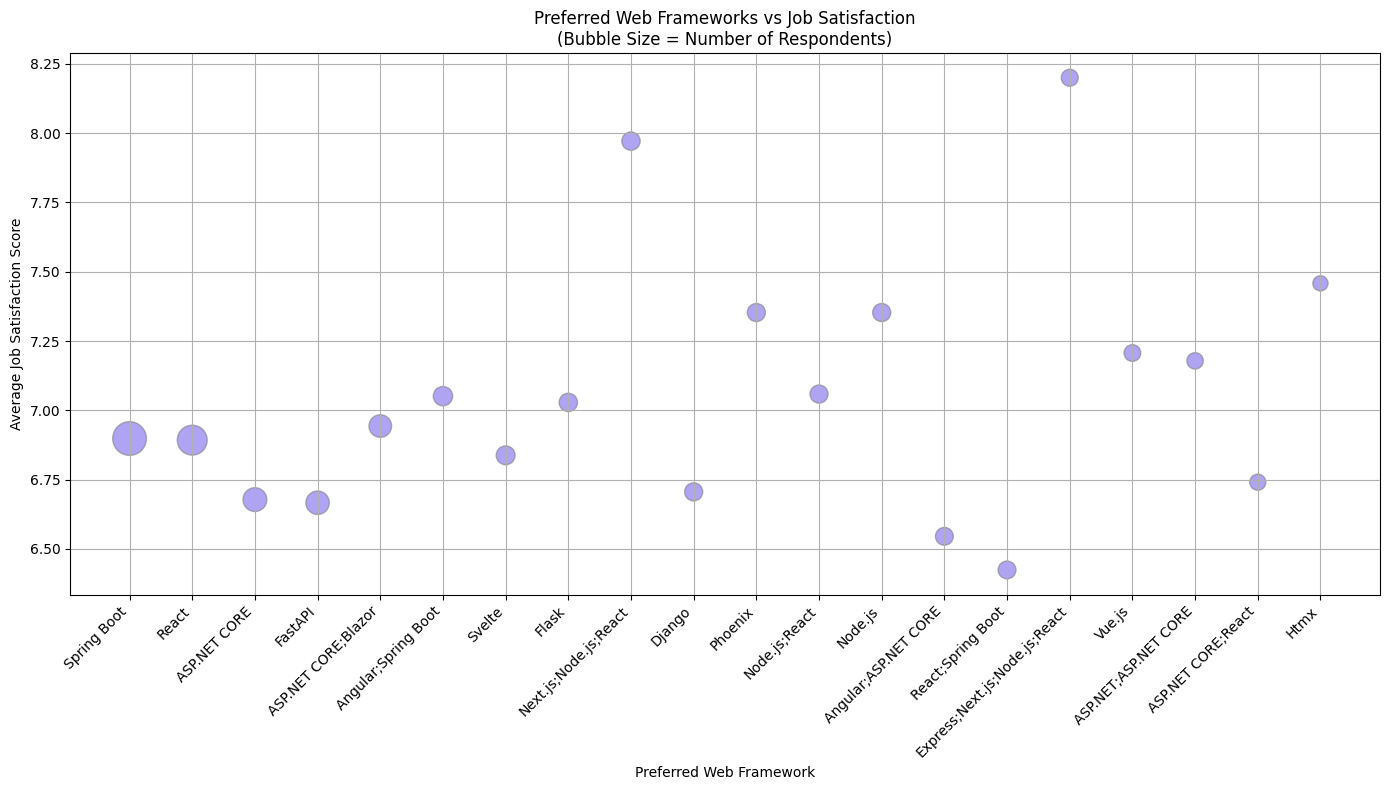

In [31]:
# 欠損除去と数値変換
df = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['JobSat'])

# カンマで分割して explode（1人1行ずつ）
df['Framework'] = df['WebframeWantToWorkWith'].str.split(',')
df = df.explode('Framework')
df['Framework'] = df['Framework'].str.strip()

# 集計（フレームワーク別の平均満足度＆回答者数）
summary = df.groupby('Framework').agg(
    AvgJobSat=('JobSat', 'mean'),
    RespondentCount=('Framework', 'count')
).reset_index()

# 件数が多いTOP20のフレームワークに絞る（視認性確保）
summary = summary.sort_values(by='RespondentCount', ascending=False).head(20)

# バブルサイズを調整
summary['BubbleSize'] = summary['RespondentCount'] * 5

# プロット
plt.figure(figsize=(14, 8))
plt.scatter(
    summary['Framework'],
    summary['AvgJobSat'],
    s=summary['BubbleSize'],
    alpha=0.6,
    color='mediumslateblue',
    edgecolors='gray'
)

# 軸・タイトル整備
plt.xticks(rotation=45, ha='right')
plt.title('Preferred Web Frameworks vs Job Satisfaction\n(Bubble Size = Number of Respondents)')
plt.xlabel('Preferred Web Framework')
plt.ylabel('Average Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



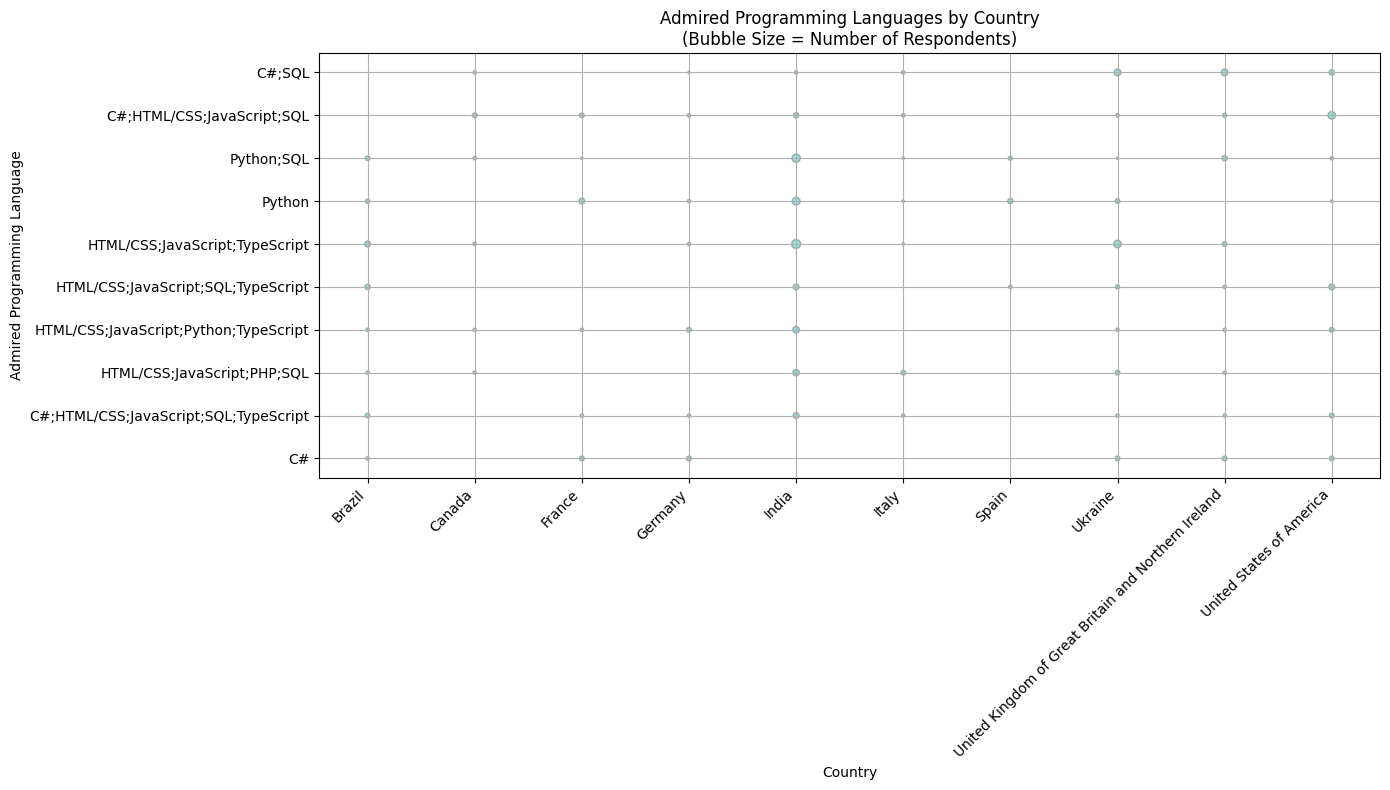

In [32]:
# 欠損除去
df = df.dropna(subset=['Country', 'LanguageAdmired'])

# 言語を分割し explode（1行1言語）
df['Language'] = df['LanguageAdmired'].str.split(',')
df = df.explode('Language')
df['Language'] = df['Language'].str.strip()

# 集計：国 × 言語 ごとの件数（人気度）
summary = df.groupby(['Country', 'Language']).size().reset_index(name='Count')

# 視認性のため、人気上位の言語・国に絞る（例：上位10言語 × 上位10か国）
top_languages = summary.groupby('Language')['Count'].sum().nlargest(10).index.tolist()
top_countries = summary.groupby('Country')['Count'].sum().nlargest(10).index.tolist()
summary = summary[summary['Language'].isin(top_languages) & summary['Country'].isin(top_countries)]

# バブルサイズ設定
summary['BubbleSize'] = summary['Count'] * 3

# プロット
plt.figure(figsize=(14, 8))
plt.scatter(
    summary['Country'],
    summary['Language'],
    s=summary['BubbleSize'],
    alpha=0.6,
    color='mediumturquoise',
    edgecolors='gray'
)

# 装飾
plt.title('Admired Programming Languages by Country\n(Bubble Size = Number of Respondents)')
plt.xlabel('Country')
plt.ylabel('Admired Programming Language')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
